In [1]:
import os
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split

from PIL import Image


# Set the paths to the "cats" and "dogs" folders
train_folder_cats = "C:\\Users\\Asus\\Desktop\my cat\\train cat"
train_folder_dogs = "C:\\Users\\Asus\\Desktop\\my cat\\train dog"

# Function to read images and create the dataset


# ...

def read_and_create_dataset(folder_path, label):
    image_files = os.listdir(folder_path)
    images = []
    labels = []
    for filename in image_files:
        image_path = os.path.join(folder_path, filename)
        try:
            image = Image.open(image_path)
            image = image.resize((100, 100))  # Resize the image if needed
            image_array = np.array(image)
            images.append(image_array)
            labels.append(label)
        except:
            print(f"Skipping file: {image_path} (Not a valid image file)")
    return images, labels

# ...


# Read cat images and create the dataset with label 0 for cats
cat_images, cat_labels = read_and_create_dataset(train_folder_cats, 0)

# Read dog images and create the dataset with label 1 for dogs
dog_images, dog_labels = read_and_create_dataset(train_folder_dogs, 1)


Skipping file: C:\Users\Asus\Desktop\my cat\train cat\_DS_Store (Not a valid image file)


In [2]:
all_images = np.array(cat_images + dog_images)
all_labels = np.array(cat_labels + dog_labels)

In [3]:
flattened_images = all_images.reshape(all_images.shape[0], -1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(flattened_images, all_labels, test_size=0.2, random_state=42)
print(X_train)

[[255 255 255 ... 255 255 255]
 [  7   7   7 ...  24  25  20]
 [ 69  52  58 ... 147 135 136]
 ...
 [ 16  29  46 ... 104  80  54]
 [144 146 133 ...  40  33  25]
 [120 118 132 ...  82  73  79]]


In [5]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
y_pred = svm_model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.625


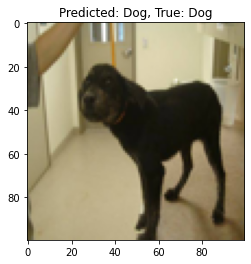

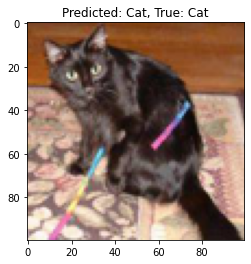

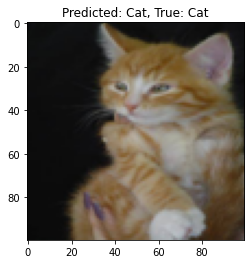

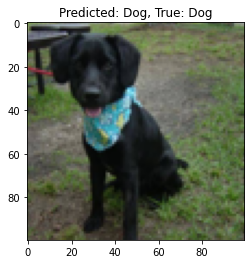

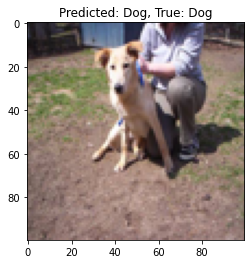

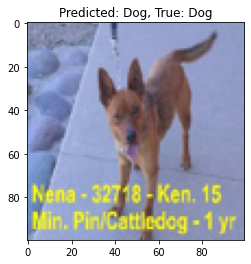

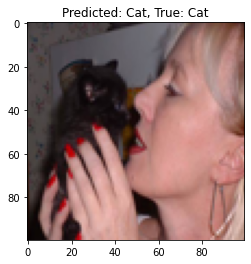

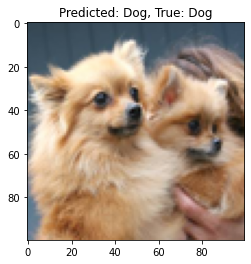

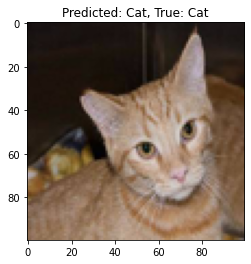

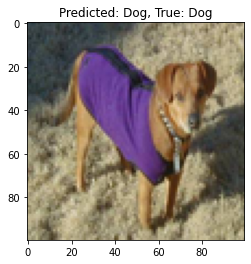

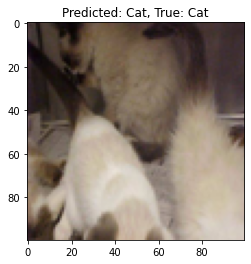

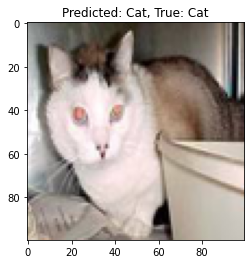

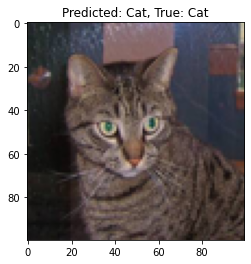

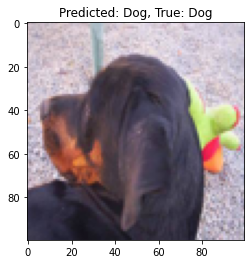

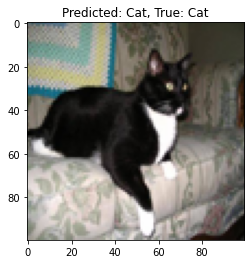

In [15]:

correct_indices = np.where(y_pred == y_test)[0]
for idx in correct_indices:
    predicted_label = "Dog" if y_pred[idx] == 1 else "Cat"
    true_label = "Dog" if y_test[idx] == 1 else "Cat"
    img = X_test[idx].reshape(100, 100, 3)  # Reshape flattened image back to original shape

    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.show()

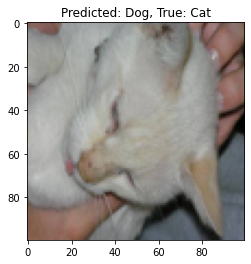

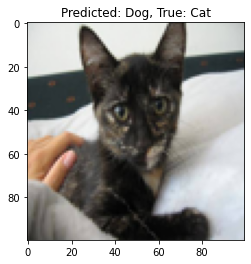

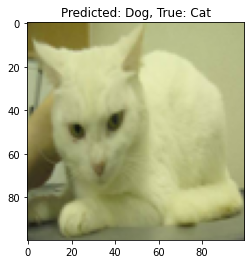

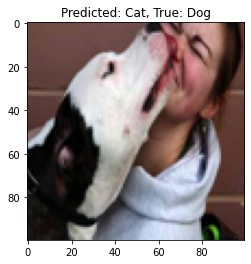

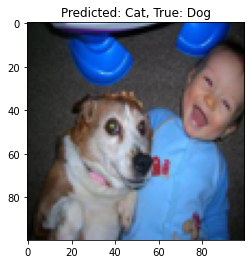

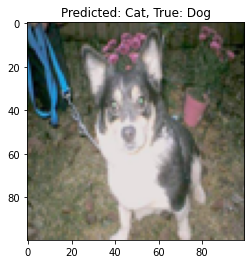

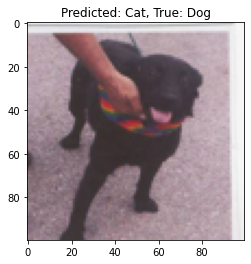

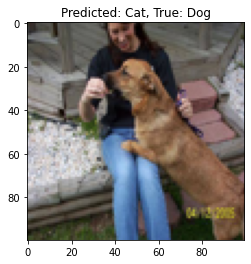

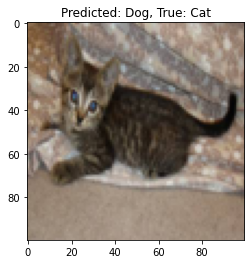

In [17]:

correct_indices = np.where(y_pred != y_test)[0]
for idx in correct_indices:
    predicted_label = "Dog" if y_pred[idx] == 1 else "Cat"
    true_label = "Dog" if y_test[idx] == 1 else "Cat"
    img = X_test[idx].reshape(100, 100, 3)  # Reshape flattened image back to original shape

    plt.figure()
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.show()